Machine Learning Engineer Nanodegree. Capstone Project: BART Transit System Ridership Prediction.

In [43]:
#import the numpy and pandas libraries

import numpy as np
import pandas as pd

#import visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the data which contains daily inter-station ridership. Display the head and the tail of the dataframe.

In [44]:
#read the data
train=pd.read_csv('date-hour-soo-dest-2017.csv')

#display first 5 rows

train.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [45]:
#display last 5 rows

train.tail()

,Origin,Destination,Throughput,DateTime
3313620,WSPR,MONT,1,2017-05-03 23:00:00
3313621,WSPR,NBRK,1,2017-05-03 23:00:00
3313622,WSPR,NCON,1,2017-05-03 23:00:00
3313623,WSPR,SANL,2,2017-05-03 23:00:00
3313624,WSPR,SHAY,4,2017-05-03 23:00:00


There are 3,313,624 rows in the dataset. DateTime period from January 1, 2017 to May 3, 2017.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313625 entries, 0 to 3313624
Data columns (total 4 columns):
Origin         object
Destination    object
Throughput     int64
DateTime       object
dtypes: int64(1), object(3)
memory usage: 101.1+ MB


Data Exploration:
In this section, I will exploring the data through visualizations. I will observe a statistical description of the target variable. Throughput is a target variable, and below is information of some descriptive statistics of the target variable.

In [47]:
train['Throughput'].value_counts().describe()

count       868.000000
mean       3817.540323
std       36809.852892
min           1.000000
25%           4.000000
50%          23.000000
75%         170.500000
max      825393.000000
Name: Throughput, dtype: float64

Descriptive statistics of the target vatiable - Throughput shows:
count(Number of non-null observations) = 868;
mean(Mean of Values) = 3817.540323;
std (Standard Deviation of the Values) = 36809.852892 is the amount of variation or dispersion of a set of data values; 
min (Minimum Value) = 1;
25% (25% Value) = 4;
50% (50% Value) = 23;
75% (75% Value) = 170.5;
max (Maximum Value) = 825393.

Exploratory Analysis:
In order to avoid Value Error with converting string to float with DateTime column. 
I'll produce following steps:
Step 1: Identify if I have missing data.

In [48]:
train.isnull().sum()

Origin         0
Destination    0
Throughput     0
DateTime       0
dtype: int64

Now, change DateTime type

In [49]:
train['DateTime'] = pd.to_datetime(train.DateTime)
train.dtypes

Origin                 object
Destination            object
Throughput              int64
DateTime       datetime64[ns]
dtype: object

Exploratory Visualization:
In this section, I will provide some form of visualization that summarizes relevant feature about the data.

In [50]:
%matplotlib inline
train['Day']=train.DateTime.dt.weekday_name
train.head()

,Origin,Destination,Throughput,DateTime,Day
0,12TH,19TH,1,2017-01-01,Sunday
1,12TH,24TH,2,2017-01-01,Sunday
2,12TH,BAYF,1,2017-01-01,Sunday
3,12TH,CIVC,5,2017-01-01,Sunday
4,12TH,COLS,2,2017-01-01,Sunday


Now I can see the data with the days of the week

Using matplotlib I visualize a Throughtput by day of the week

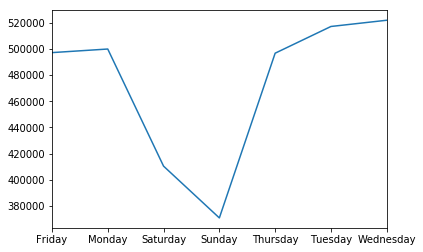

In [51]:
train.Day.value_counts().sort_index().plot()

According to visualization above, it seems that the highest nember of Throughput is on Wednesday. Throughtput is around 520,000

I'll change the type of the 'Day' column to the integer

In [54]:
train['DateTime'] = pd.to_datetime(train.DateTime)
train['Day']=train.DateTime.dt.dayofweek
train.dtypes

Origin                 object
Destination            object
Throughput              int64
DateTime       datetime64[ns]
Day                     int64
dtype: object

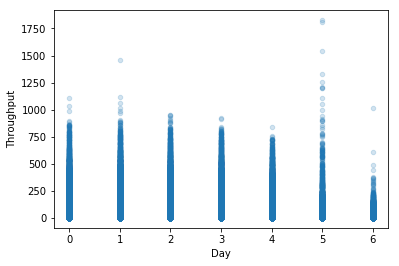

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
train.plot(kind="scatter", x="Day", y="Throughput", alpha=0.2)
plt.savefig('map1.png')

I'll color data visualization from the most busiest to the least busiest days

I'll create a scatter plot with Throughput and Day to visualize the data:

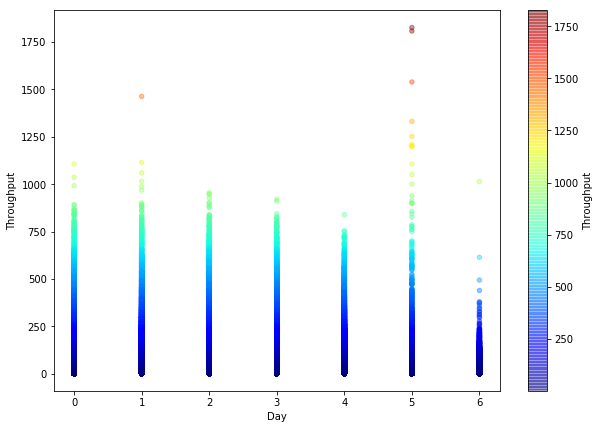

In [82]:
train.plot(kind="scatter", x="Day", y="Throughput", alpha=0.4, figsize=(10,7),
    c="Throughput", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

It seems that busiest day is 5

Train Test Split

The goal is to create a model that generalises well to new data. The test set serves as a proxy for new data. Trained data is the data on which we apply the linear regression algorithm. And finally I test that algorithm on the test data. The code for splitting is as follows:

In [74]:
from sklearn.cross_validation import train_test_split
X = train[["Day"]]
y = train["Throughput"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

From the above code snippet I infer 20% of the data which goes to the test data and the rest remains in the training set.

Training and Predicting: Linear Regression is gradient descent. Gradient descent is a method of updating a_0 and a_1 to reduce the cost function. The idea is that we start with some values for a_0 and a_1 and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, I have a working Linear Regression model.

Calculate mean absolute error (MAE):

In [78]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)

14.296556398102966

In [ ]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)

Linear Regression MAE: 14.296556398102966.

Calculate Mean. Mean is a Benchmark. I can say that prediction is quite close to the Benchmark

In [81]:
from statistics import mean 
train['Throughput'].mean()

12.536420083745144

Cross-Validation TimeSeriesSplit 

In [21]:
from sklearn.model_selection import TimeSeriesSplit

X = train.values
splits = TimeSeriesSplit(n_splits=3)
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print(len(train) + len(test))
    print(len(train))
    print(len(test))

1656813
828407
828406
2485219
1656813
828406
3313625
2485219
828406
